In [1]:
from sklearn.datasets import make_classification
import torch

In [2]:
class CustomDataset:
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        current_sample = self.data[idx, :]
        current_target = self.targets[idx]
        return {
            "sample": torch.tensor(current_sample, dtype = torch.float),
            "target": torch.tensor(current_target, dtype = torch.long)
        }

In [3]:
data, targets = make_classification(n_samples = 1000)

In [4]:
len(data)

1000

In [5]:
dataset = CustomDataset(data = data, targets= targets)

In [6]:
#?torch.utils.data.DataLoader

In [7]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 4, num_workers = 2)

In [8]:
train_loader

In [10]:
##Loading FashionMNIST Dataset

In [11]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [12]:
training_data = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = ToTensor())

100.0%

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw


111.0%

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw


100.0%

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw


159.1%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw
Processing...


C:\Users\Abhijeet\Anaconda3\envs\env_pytorch\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [13]:
test_data = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = ToTensor())

In [15]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

In [16]:
train_dataloader

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


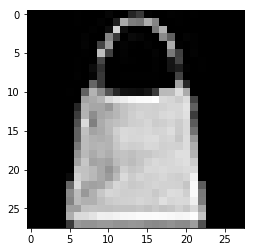

Label : 8


In [18]:
#Iterate through the Dataloader and display image and labels.
import matplotlib.pyplot as plt
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape : {train_features.size()}")
print(f"Labels batch shape : {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap = "gray")
plt.show()

print(f"Label : {label}")